<a href="https://colab.research.google.com/github/lemmynation/DataScienceEcosystem/blob/main/Copy_of_5_Experiments_in_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Data Science Masters/2023-2024 Second Sem/Machine Learning/churn.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,Unnamed: 0,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave
0,1,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [ ]:
df.shape

(20000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   20000 non-null  int64 
 1   college                      20000 non-null  object
 2   income                       20000 non-null  int64 
 3   overage                      20000 non-null  int64 
 4   leftover                     20000 non-null  int64 
 5   house                        20000 non-null  int64 
 6   handset_price                20000 non-null  int64 
 7   over_15mins_calls_per_month  20000 non-null  int64 
 8   average_call_duration        20000 non-null  int64 
 9   reported_satisfaction        20000 non-null  object
 10  reported_usage_level         20000 non-null  object
 11  considering_change_of_plan   20000 non-null  object
 12  leave                        20000 non-null  object
dtypes: int64(8), object(5)
memory u

In [ ]:
df.isna().sum()

Unnamed: 0                     0
college                        0
income                         0
overage                        0
leftover                       0
house                          0
handset_price                  0
over_15mins_calls_per_month    0
average_call_duration          0
reported_satisfaction          0
reported_usage_level           0
considering_change_of_plan     0
leave                          0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,10000.50,80281.45,85.98,23.90,493155.26,389.62,8.00,6.00
std,5773.65,41680.59,85.99,26.82,252407.88,213.82,8.93,4.40
min,1.00,20007.00,-2.00,0.00,150002.00,130.00,0.00,1.00
25%,5000.75,42217.00,0.00,0.00,263714.25,219.00,1.00,2.00
50%,10000.50,75366.50,59.00,14.00,452259.50,326.00,4.00,5.00
75%,15000.25,115881.75,179.00,41.00,702378.00,533.25,15.00,10.00
max,20000.00,159983.00,335.00,89.00,999996.00,899.00,29.00,15.00


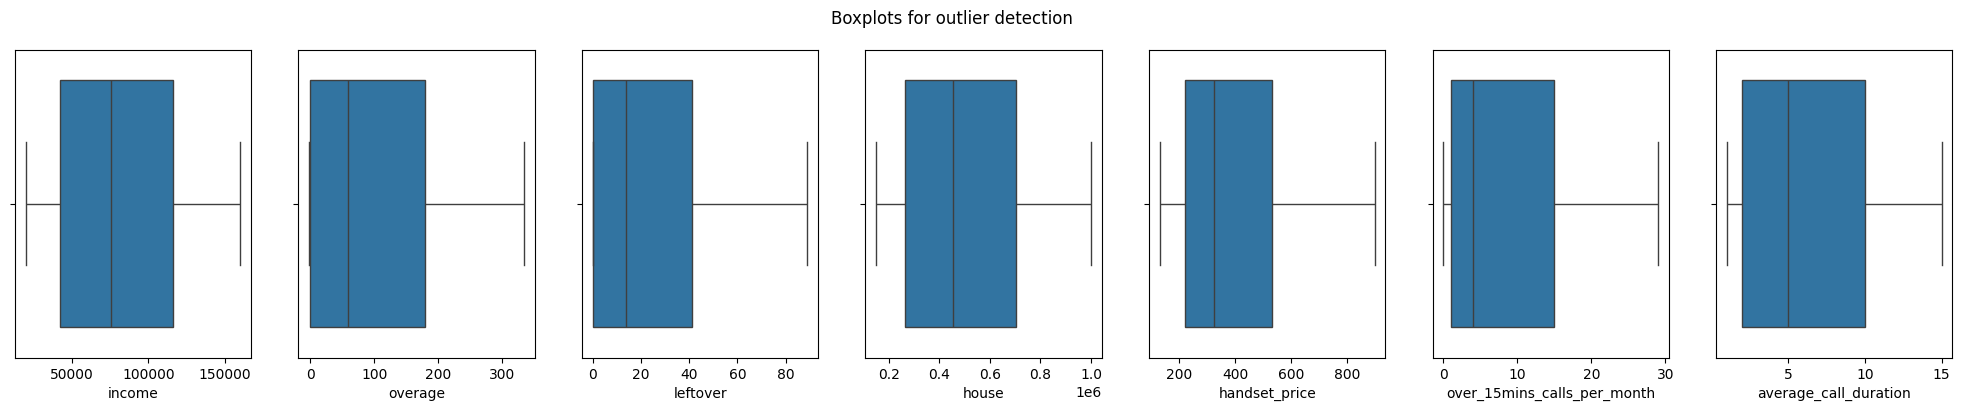

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(25, 4))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['income'])
sns.boxplot(ax=axes[1], x=df['overage'])
sns.boxplot(ax=axes[2], x=df['leftover'])
sns.boxplot(ax=axes[3], x=df['house'])
sns.boxplot(ax=axes[4], x=df['handset_price'])
sns.boxplot(ax=axes[5], x=df['over_15mins_calls_per_month'])
sns.boxplot(ax=axes[6], x=df['average_call_duration'])
plt.show();

In [ ]:
df = df.drop(['Unnamed: 0'],axis = 1)

In [ ]:
df.head()

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [ ]:
df.corr(method='pearson',numeric_only=True)

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration
income,1.00,0.00,0.01,-0.01,0.73,0.00,-0.01
overage,0.00,1.00,-0.00,0.00,0.00,0.77,0.00
leftover,0.01,-0.00,1.00,0.01,0.00,-0.01,-0.66
house,-0.01,0.00,0.01,1.00,-0.01,0.01,-0.01
handset_price,0.73,0.00,0.00,-0.01,1.00,0.00,-0.01
over_15mins_calls_per_month,0.00,0.77,-0.01,0.01,0.00,1.00,0.01
average_call_duration,-0.01,0.00,-0.66,-0.01,-0.01,0.01,1.00


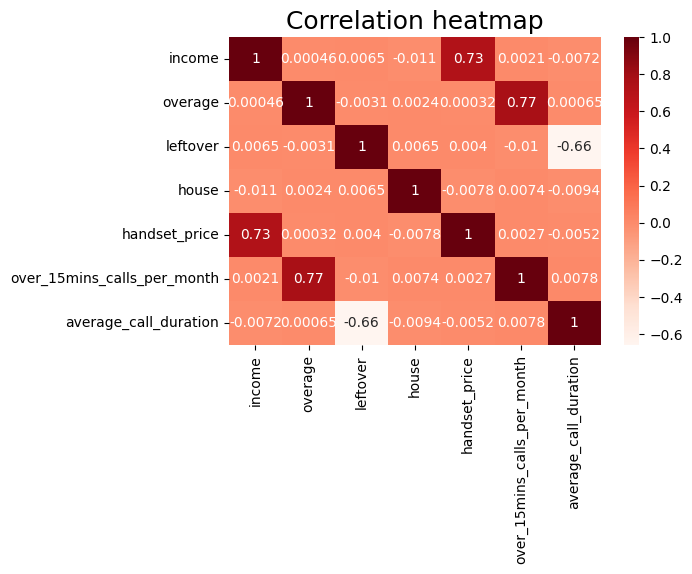

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(method='pearson',numeric_only='True'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

In [ ]:
df_RFE = df.copy(deep=True)

In [ ]:
non_numeric_columns = df_RFE.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['college', 'reported_satisfaction', 'reported_usage_level',
       'considering_change_of_plan', 'leave'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Use OneHotEncoder to convert categorical variables to numeric

X = df_RFE.drop(columns='leave')  # Features
y = df_RFE['leave']

encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(df_RFE[non_numeric_columns])

# Convert the encoded columns back to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(non_numeric_columns))

# Drop original non-numeric columns and concatenate the encoded columns
X = df_RFE.drop(columns=non_numeric_columns)
X = pd.concat([X, X_encoded_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = LogisticRegression()

# Apply RFE
rfe = RFE(estimator=model, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Feature ranking (1 means selected, higher numbers indicate less important features)
print("Feature Ranking:", rfe.ranking_)

# Transform the dataset to keep only the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the model with the selected features
model.fit(X_train_rfe, y_train)

# Evaluate the model
score = model.score(X_test_rfe, y_test)
print("Model Accuracy with selected features:", score)


Selected Features: Index(['reported_satisfaction_unsat', 'reported_satisfaction_very_sat',
       'reported_satisfaction_very_unsat', 'reported_usage_level_very_high',
       'leave_STAY'],
      dtype='object')
Feature Ranking: [ 9  6  4 10  8  7  3 12 13  1  1  1 17 16  1  2  5 15 11 14  1]
Model Accuracy with selected features: 1.0


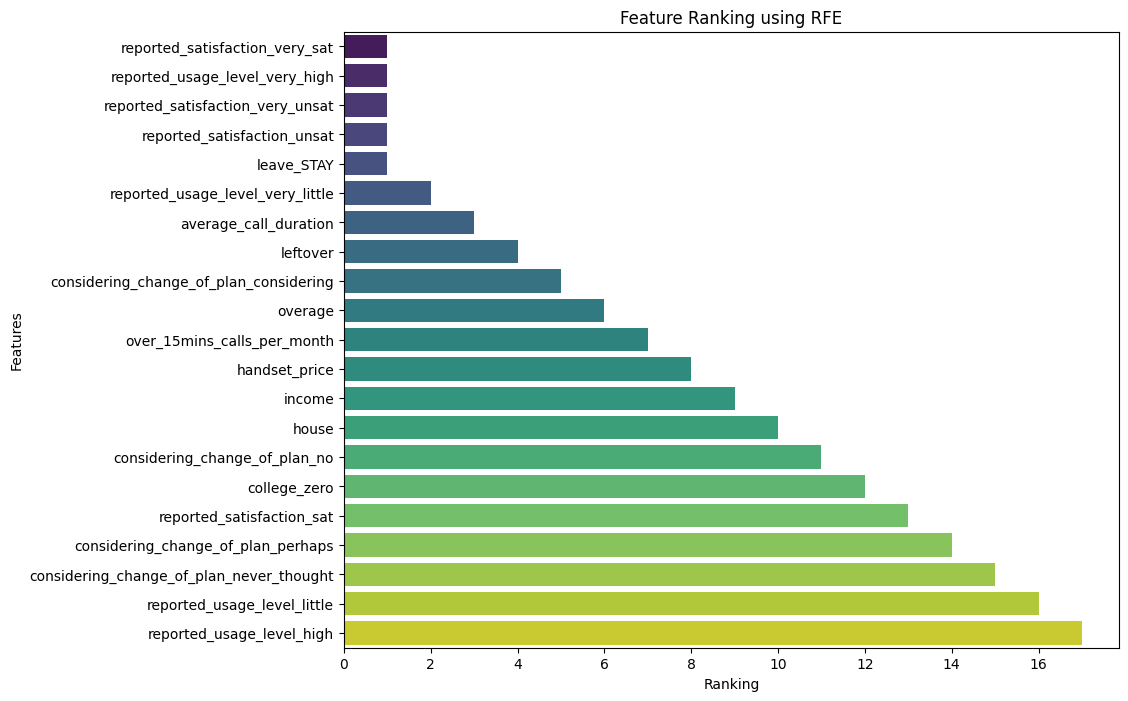

In [ ]:
rfe = RFE(estimator=model, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)

# Get feature rankings
ranking = rfe.ranking_
feature_names = X.columns

# Create a DataFrame for plotting
feature_ranking_df = pd.DataFrame({'Feature': feature_names, 'Ranking': ranking})

# Sort the DataFrame by ranking
feature_ranking_df = feature_ranking_df.sort_values(by='Ranking')

# Plot the feature rankings
plt.figure(figsize=(10, 8))
sns.barplot(x='Ranking', y='Feature', data=feature_ranking_df, palette='viridis')
plt.title('Feature Ranking using RFE')
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.show()

In [ ]:
X_encoded_df.head()

,college_zero,reported_satisfaction_sat,reported_satisfaction_unsat,reported_satisfaction_very_sat,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
1,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
2,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00
3,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00



Based on the results of the Recursive Feature Elimination (RFE) process and model evaluation, it seems you should focus on retaining the following features for your data modeling:



1.   reported_satisfaction_unsat
2.   reported_satisfaction_very_unsat
3.   reported_satisfaction_very_sat
4.   reported_usage_level_very_high
5.   leave_STAY


In [ ]:
selected_features = ['reported_satisfaction_unsat', 'reported_satisfaction_very_unsat',
                    'reported_satisfaction_very_sat', 'reported_usage_level_very_high',
                    'leave_STAY']

# Drop the features except the selected ones
X_encoded_selected = X_encoded_df[selected_features]

In [ ]:
X_encoded_selected.head()

,reported_satisfaction_unsat,reported_satisfaction_very_unsat,reported_satisfaction_very_sat,reported_usage_level_very_high,leave_STAY
0,1.00,0.00,0.00,0.00,1.00
1,1.00,0.00,0.00,0.00,1.00
2,1.00,0.00,0.00,0.00,1.00
3,1.00,0.00,0.00,1.00,0.00
4,0.00,1.00,0.00,0.00,1.00


In [ ]:
from sklearn.model_selection import train_test_split


x = X_encoded_selected.drop(columns=['leave_STAY'])
y = X_encoded_selected.leave_STAY # contains the target variable

xtrain_, xtest_, ytrain_, ytest_ = train_test_split(x, y, test_size=0.2, random_state = 42)

In [ ]:
def get_score(names, models, _X_train, _y_train, _X_test, _y_test, index):
    res = {' ':[index]} # key and a list containing the provided index as the value.
    for n, model in enumerate(models):
      trained = model.fit(_X_train, _y_train)
      score = trained.score(_X_test, _y_test)
      res[names[n]] = score
    df = pd.DataFrame(res).set_index(' ') # Converts the res dictionary into a DataFrame using pandas (pd.DataFrame(res))
    return df

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [ ]:
def get_validators():
  NN = MLPClassifier(max_iter = 1000)
  LR = LogisticRegression(max_iter = 1000)
  SVM = SVC()
  ABC = AdaBoostClassifier()
  GBC = GradientBoostingClassifier()
  KNN = KNeighborsClassifier()
  GNB = GaussianNB()
  ET = ExtraTreesClassifier()
  RF = RandomForestClassifier()
  DT = DecisionTreeClassifier()
  XGB = XGBClassifier()

  return ([     'Neural Network',
                'Logistic Regression',
                'Support Vector Machine',
                'Ada Boost Classifier',
                'Gradient Boosting Classifier',
                'K-Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Extra Trees',
               'Random Forest',
               'Decision Tree',
               'XGB Classifier'],
          [NN, LR, SVM, ABC, GBC, KNN, GNB, ET, RF, DT, XGB])

In [ ]:
names, models = get_validators()
scores = get_score(names, models, xtrain_, ytrain_, xtest_, ytest_, 'Churn_Accu')

scores

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
,,,,,,,,,,,
Churn_Accu,0.51,0.52,0.51,0.52,0.51,0.49,0.52,0.51,0.51,0.51,0.51


In [ ]:
def cross_validate(names, models, _X_train, _y_train, index, cv=5):
  res = []
  for model in models:
    draft = model_selection.cross_val_score(model, _X_train, _y_train, cv=cv)
    res.append(draft)
  index = [index+' CV_' + str(i) for i in range(cv)]
  accuracy = pd.DataFrame(np.array(res).T,
                          columns=names,
                          index=index,
                          ).round(decimals=3)
  return accuracy

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2,random_state=42 )

In [ ]:
model_names, models = get_validators()
accuracy = cross_validate(model_names, models, xtrain, ytrain, 'Churn_CV')
accuracy

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
Churn_CV CV_0,0.51,0.50,0.50,0.50,0.50,0.49,0.50,0.50,0.50,0.50,0.50
Churn_CV CV_1,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50
Churn_CV CV_2,0.49,0.50,0.49,0.50,0.49,0.50,0.50,0.49,0.49,0.49,0.49
Churn_CV CV_3,0.50,0.49,0.50,0.49,0.50,0.49,0.49,0.50,0.50,0.50,0.50
Churn_CV CV_4,0.51,0.50,0.51,0.50,0.51,0.51,0.50,0.51,0.51,0.51,0.51


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Define hyperparameters for each model
param_grid = {
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['logistic', 'tanh', 'relu'],
        'alpha': [0.0001, 0.001, 0.01],
    },
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
    },
    'Support Vector Machine': {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
    },
    'Ada Boost Classifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
    },
    'Gradient Boosting Classifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'max_depth': [3, 5, 7],
    },
    'Extra Trees': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
    },
    'Gaussian Naive Bayes': {},  # No hyperparameters to tune
    'Decision Tree': {
        'max_depth': [None, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    },
    'XGB Classifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'max_depth': [3, 5, 7],
    },
}

# Create models
models = {
    'Neural Network': MLPClassifier(max_iter=1000),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Ada Boost Classifier': AdaBoostClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGB Classifier': XGBClassifier(),
}

# Perform grid search for each model with parallel processing
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Hyperparameters for {model_name}: {grid_search.best_params_}")
    print(f"Best CV Score for {model_name}: {grid_search.best_score_}")

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    test_score = model.score(X_test, y_test)
    print(f"Test Accuracy for {model_name}: {test_score}")

Tuning Neural Network...


KeyboardInterrupt: 

# **EXPERIMENT USING RL 2**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Data Science Masters/2023-2024 Second Sem/Machine Learning/churn.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,Unnamed: 0,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave
0,1,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [ ]:
df_encoded = pd.get_dummies(df.drop(columns=['Unnamed: 0']), drop_first=True)

In [ ]:
df_encoded.head()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,reported_satisfaction_unsat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,31953,0,6,313378,161,0,4,True,False,True,...,False,False,True,False,False,False,False,True,False,True
1,36147,0,13,800586,244,0,6,False,False,True,...,False,False,True,False,False,True,False,False,False,True
2,27273,230,0,305049,201,16,15,False,False,True,...,False,False,False,False,True,False,False,False,True,True
3,120070,38,33,788235,780,3,2,True,False,True,...,False,False,False,True,False,True,False,False,False,False
4,29215,208,85,224784,241,21,1,False,False,False,...,True,False,True,False,False,False,True,False,False,True


In [ ]:
X = df_encoded.drop(columns=['leave_STAY'])
y = df_encoded['leave_STAY']

In [ ]:
def objective_function(selected_features):
    if np.sum(selected_features) == 0:
        return 0  # If no features are selected, return 0 accuracy
    selected_columns = X.columns[selected_features == 1]
    X_selected = X[selected_columns]
    clf = LogisticRegression()
    scores = cross_val_score(clf, X_selected, y, cv=5, scoring='accuracy')
    return scores.mean()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
# Initialize parameters for GSA
num_agents = 20
max_iter = 100
G0 = 100  # Initial gravitational constant
alpha = 20  # Decrease coefficient
epsilon = 1e-5  # Small constant to avoid division by zero

# Initialize the positions and velocities of agents randomly
num_features = X.shape[1]
positions = np.random.randint(2, size=(num_agents, num_features))
velocities = np.zeros((num_agents, num_features))

# Run GSA
best_fitness = -np.inf
best_position = None

for iter in range(max_iter):
    fitness = np.array([objective_function(agent) for agent in positions])
    if np.max(fitness) > best_fitness:
        best_fitness = np.max(fitness)
        best_position = positions[np.argmax(fitness)]

    # Calculate masses
    masses = (fitness - np.min(fitness)) / (np.sum(fitness - np.min(fitness)) + epsilon)

    # Update gravitational constant
    G = G0 * np.exp(-alpha * iter / max_iter)

    # Update velocities and positions
    for i in range(num_agents):
        force = np.zeros(num_features)
        for j in range(num_agents):
            if i != j:
                distance = np.linalg.norm(positions[i] - positions[j])
                force += (np.random.random() * masses[j] * (positions[j] - positions[i])) / (distance + epsilon)

        acceleration = force / (masses[i] + epsilon)
        velocities[i] = np.random.random() * velocities[i] + acceleration
        positions[i] = positions[i] + velocities[i]

        # Apply boundary conditions
        positions[i] = np.clip(positions[i], 0, 1)
        positions[i] = np.round(positions[i])

    print(f"Iteration {iter+1}/{max_iter}, Best Fitness: {best_fitness}")

# Print the best selected features
best_selected_features = X.columns[best_position == 1]
print(f"Best selected features: {best_selected_features}")

Iteration 1/100, Best Fitness: 0.6346499999999999
Iteration 2/100, Best Fitness: 0.6346499999999999
Iteration 3/100, Best Fitness: 0.6346499999999999
Iteration 4/100, Best Fitness: 0.6346499999999999
Iteration 5/100, Best Fitness: 0.6346499999999999
Iteration 6/100, Best Fitness: 0.6346499999999999
Iteration 7/100, Best Fitness: 0.6346499999999999
Iteration 8/100, Best Fitness: 0.63475
Iteration 9/100, Best Fitness: 0.63475
Iteration 10/100, Best Fitness: 0.63475
Iteration 11/100, Best Fitness: 0.63475
Iteration 12/100, Best Fitness: 0.63475
Iteration 13/100, Best Fitness: 0.63475
Iteration 14/100, Best Fitness: 0.63475
Iteration 15/100, Best Fitness: 0.63475
Iteration 16/100, Best Fitness: 0.63475
Iteration 17/100, Best Fitness: 0.63475
Iteration 18/100, Best Fitness: 0.63475
Iteration 19/100, Best Fitness: 0.63475
Iteration 20/100, Best Fitness: 0.63475
Iteration 21/100, Best Fitness: 0.63475
Iteration 22/100, Best Fitness: 0.63475
Iteration 23/100, Best Fitness: 0.63475
Iteration 24

In [ ]:
X.head()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,reported_satisfaction_unsat,reported_satisfaction_very_sat,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps
0,31953,0,6,313378,161,0,4,True,False,True,False,False,False,True,False,False,False,False,True,False
1,36147,0,13,800586,244,0,6,False,False,True,False,False,False,True,False,False,True,False,False,False
2,27273,230,0,305049,201,16,15,False,False,True,False,False,False,False,False,True,False,False,False,True
3,120070,38,33,788235,780,3,2,True,False,True,False,False,False,False,True,False,True,False,False,False
4,29215,208,85,224784,241,21,1,False,False,False,False,True,False,True,False,False,False,True,False,False


In [ ]:
# Define the best selected features
best_selected_features = ['overage', 'leftover', 'house', 'handset_price', 'reported_satisfaction_unsat']

# Drop other features from X
X = X[best_selected_features]

In [ ]:
X.head()

,overage,leftover,house,handset_price,reported_satisfaction_unsat
0,0,6,313378,161,True
1,0,13,800586,244,True
2,230,0,305049,201,True
3,38,33,788235,780,True
4,208,85,224784,241,False


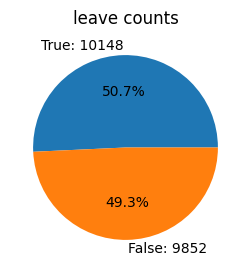

In [ ]:
fig = plt.figure(figsize=(3,3))
data=y.value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('leave counts');

before Counter({True: 10148, False: 9852})
after Counter({True: 10148, False: 10148})


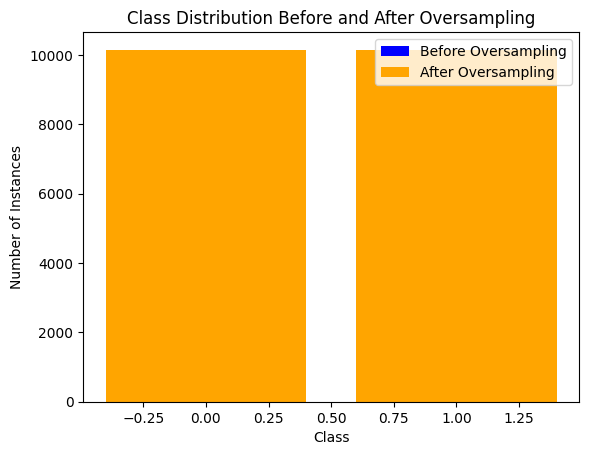

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt



# The output will show the class distribution before applying SMOTE.
print('before',Counter(y))

smote = SMOTE()
smotex, smotey = smote.fit_resample(X, y)

print('after', Counter(smotey))

plt.bar(Counter(y).keys(), Counter(y).values(), color='blue', label='Before Oversampling')
plt.bar(Counter(smotey).keys(), Counter(smotey).values(), color='orange', label='After Oversampling')
plt.legend()
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution Before and After Oversampling')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in X:
  smotex[col] = smotex[col].astype(float)
  smotex[[col]] = scaler.fit_transform(smotex[[col]])

smotex.head()

,overage,leftover,house,handset_price,reported_satisfaction_unsat
0,-1.01,-0.67,-0.71,-1.07,2.02
1,-1.01,-0.41,1.22,-0.68,2.02
2,1.67,-0.89,-0.74,-0.88,2.02
3,-0.56,0.34,1.17,1.83,2.02
4,1.42,2.28,-1.06,-0.70,-0.50


In [ ]:
def get_validators():
  NN = MLPClassifier(max_iter = 1000)
  LR = LogisticRegression(max_iter = 1000)
  SVM = SVC()
  ABC = AdaBoostClassifier()
  GBC = GradientBoostingClassifier()
  KNN = KNeighborsClassifier()
  GNB = GaussianNB()
  ET = ExtraTreesClassifier()
  RF = RandomForestClassifier()
  DT = DecisionTreeClassifier()
  XGB = XGBClassifier()

  return ([     'Neural Network',
                'Logistic Regression',
                'Support Vector Machine',
                'Ada Boost Classifier',
                'Gradient Boosting Classifier',
                'K-Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Extra Trees',
               'Random Forest',
               'Decision Tree',
               'XGB Classifier'],
          [NN, LR, SVM, ABC, GBC, KNN, GNB, ET, RF, DT, XGB])

In [ ]:
def get_score(names, models, _X_train, _y_train, _X_test, _y_test, index):
    res = {' ':[index]} # key and a list containing the provided index as the value.
    for n, model in enumerate(models):
      trained = model.fit(_X_train, _y_train)
      score = trained.score(_X_test, _y_test)
      res[names[n]] = score
    df = pd.DataFrame(res).set_index(' ') # Converts the res dictionary into a DataFrame using pandas (pd.DataFrame(res))
    return df


In [ ]:
from sklearn.model_selection import train_test_split



xtrain_, xtest_, ytrain_, ytest_ = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
names, models = get_validators()
scores = get_score(names, models, xtrain_, ytrain_, xtest_, ytest_, 'Churn_Accu')

scores

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
,,,,,,,,,,,
Churn_Accu,0.51,0.64,0.61,0.66,0.69,0.59,0.64,0.67,0.68,0.60,0.68


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Stochastic Gradient Boosting Classifier
sgb_clf = GradientBoostingClassifier(subsample=0.8, max_features='sqrt', random_state=42)

# Train the model
sgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sgb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.69475


using Min Max Normalization

In [ ]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

# Standardization
scaler_standard = StandardScaler()
X = scaler_standard.fit_transform(X)

In [ ]:
xtrain_, xtest_, ytrain_, ytest_ = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
names, models = get_validators()
scores = get_score(names, models, xtrain_, ytrain_, xtest_, ytest_, 'Churn_Accu')

scores

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
,,,,,,,,,,,
Churn_Accu,0.69,0.64,0.67,0.66,0.69,0.66,0.64,0.67,0.67,0.61,0.68


In [ ]:
def cross_validate(names, models, _X_train, _y_train, index, cv=5):
  res = []
  for model in models:
    draft = model_selection.cross_val_score(model, _X_train, _y_train, cv=cv)
    res.append(draft)
  index = [index+' CV_' + str(i) for i in range(cv)]
  accuracy = pd.DataFrame(np.array(res).T,
                          columns=names,
                          index=index,
                          ).round(decimals=3)
  return accuracy

In [ ]:
model_names, models = get_validators()
accuracy = cross_validate(model_names, models, xtrain_, ytrain_, 'Churn_CV')


accuracy

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
Churn_CV CV_0,0.68,0.64,0.67,0.66,0.68,0.65,0.64,0.66,0.67,0.61,0.68
Churn_CV CV_1,0.67,0.64,0.67,0.67,0.69,0.65,0.64,0.67,0.68,0.61,0.68
Churn_CV CV_2,0.68,0.64,0.68,0.66,0.68,0.65,0.64,0.66,0.67,0.60,0.68
Churn_CV CV_3,0.68,0.64,0.67,0.66,0.69,0.65,0.64,0.67,0.69,0.61,0.68
Churn_CV CV_4,0.68,0.63,0.68,0.67,0.69,0.64,0.64,0.67,0.67,0.60,0.67


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd


from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

# Standardization
scaler_standard = StandardScaler()
X = scaler_standard.fit_transform(X)




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define neural network model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

# Define a smaller hyperparameter grid
param_grid = {
    'alpha': [0.0001, 0.001],
}

# Perform grid search with reduced parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit grid search to data
grid_search.fit(X_train, y_train)

# Make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.68


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with default parameters
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Ada Boost Classifier': AdaBoostClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Extra Trees': ExtraTreesClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGB Classifier': XGBClassifier()
}

# Define smaller hyperparameter grids
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1]},
    'Support Vector Machine': {'C': [0.001, 0.01, 0.1, 1]},
    'Ada Boost Classifier': {'n_estimators': [50, 100, 200]},
    'Gradient Boosting Classifier': {'n_estimators': [50, 100, 200]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 10]},
    'Extra Trees': {'n_estimators': [50, 100, 200]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'XGB Classifier': {'n_estimators': [50, 100, 200]}
}

# Perform grid search for each model
best_models = {}
for model_name, model in models.items():
    if model_name in param_grids:
        print(f"Tuning {model_name}...")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=3, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best Hyperparameters for {model_name}: {grid_search.best_params_}")
    else:
        print(f"Skipping {model_name} as it has no hyperparameters to tune.")
        best_models[model_name] = model
        best_models[model_name].fit(X_train, y_train)

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    test_score = model.score(X_test, y_test)
    print(f"Test Accuracy for {model_name}: {test_score}")

Tuning Logistic Regression...
Best Hyperparameters for Logistic Regression: {'C': 1}
Tuning Support Vector Machine...
Best Hyperparameters for Support Vector Machine: {'C': 1}
Tuning Ada Boost Classifier...
Best Hyperparameters for Ada Boost Classifier: {'n_estimators': 50}
Tuning Gradient Boosting Classifier...
Best Hyperparameters for Gradient Boosting Classifier: {'n_estimators': 100}
Tuning K-Nearest Neighbors...
Best Hyperparameters for K-Nearest Neighbors: {'n_neighbors': 10}
Skipping Gaussian Naive Bayes as it has no hyperparameters to tune.
Tuning Extra Trees...
Best Hyperparameters for Extra Trees: {'n_estimators': 100}
Tuning Random Forest...
Best Hyperparameters for Random Forest: {'n_estimators': 200}
Tuning Decision Tree...
Best Hyperparameters for Decision Tree: {'max_depth': 5}
Tuning XGB Classifier...
Best Hyperparameters for XGB Classifier: {'n_estimators': 50}
Test Accuracy for Logistic Regression: 0.6365
Test Accuracy for Support Vector Machine: 0.671
Test Accuracy f

# 1st Experiment (WITH Value Encoding Only)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/Data Science Masters/2023-2024 Second Sem/Machine Learning/churn.csv'
df = pd.read_csv(path)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [ ]:
df.head()

,Unnamed: 0,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave
0,1,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,1,31953,0,6,313378,161,0,4,True,False,...,False,False,True,False,False,False,False,True,False,True
1,2,36147,0,13,800586,244,0,6,False,False,...,False,False,True,False,False,True,False,False,False,True
2,3,27273,230,0,305049,201,16,15,False,False,...,False,False,False,False,True,False,False,False,True,True
3,4,120070,38,33,788235,780,3,2,True,False,...,False,False,False,True,False,True,False,False,False,False
4,5,29215,208,85,224784,241,21,1,False,False,...,True,False,True,False,False,False,True,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split


x = df.drop(columns=['leave_STAY'])
y = df.leave_STAY # contains the target variable

xtrain_, xtest_, ytrain_, ytest_ = train_test_split(x, y, test_size=0.2, random_state = 42)

In [ ]:
def get_score(names, models, _X_train, _y_train, _X_test, _y_test, index):
    res = {' ':[index]} # key and a list containing the provided index as the value.
    for n, model in enumerate(models):
      trained = model.fit(_X_train, _y_train)
      score = trained.score(_X_test, _y_test)
      res[names[n]] = score
    df = pd.DataFrame(res).set_index(' ') # Converts the res dictionary into a DataFrame using pandas (pd.DataFrame(res))
    return df



In [ ]:
def get_validators():
  NN = MLPClassifier(max_iter = 1000)
  LR = LogisticRegression(max_iter = 1000)
  SVM = SVC()
  ABC = AdaBoostClassifier()
  GBC = GradientBoostingClassifier()
  KNN = KNeighborsClassifier()
  GNB = GaussianNB()
  ET = ExtraTreesClassifier()
  RF = RandomForestClassifier()
  DT = DecisionTreeClassifier()
  XGB = XGBClassifier()

  return ([     'Neural Network',
                'Logistic Regression',
                'Support Vector Machine',
                'Ada Boost Classifier',
                'Gradient Boosting Classifier',
                'K-Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Extra Trees',
               'Random Forest',
               'Decision Tree',
               'XGB Classifier'],
          [NN, LR, SVM, ABC, GBC, KNN, GNB, ET, RF, DT, XGB])

In [ ]:
names, models = get_validators()
scores = get_score(names, models, xtrain_, ytrain_, xtest_, ytest_, 'Churn_Accu')

scores

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
,,,,,,,,,,,
Churn_Accu,0.60,0.64,0.61,0.67,0.70,0.59,0.64,0.68,0.70,0.61,0.69


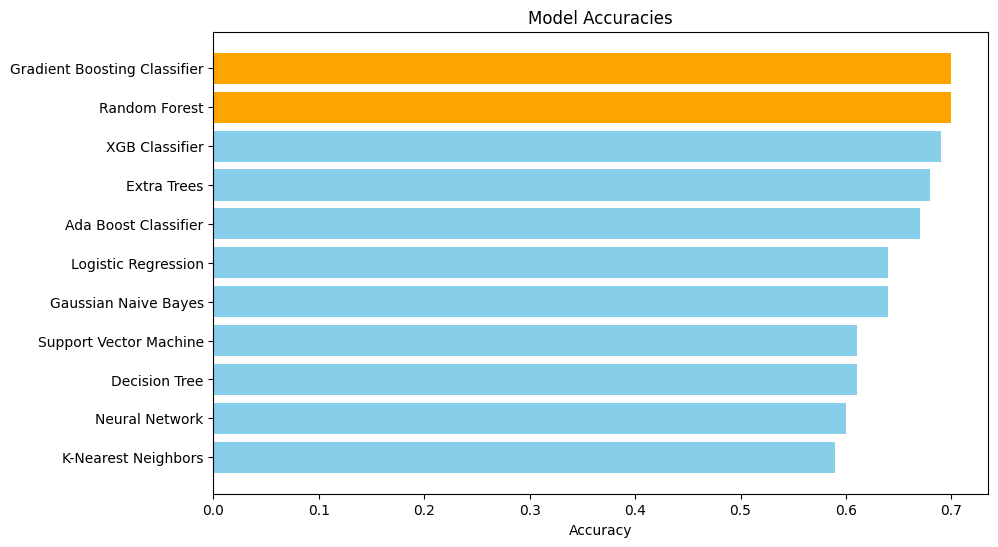

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracies = {
    'Neural Network': 0.60,
    'Logistic Regression': 0.64,
    'Support Vector Machine': 0.61,
    'Ada Boost Classifier': 0.67,
    'Gradient Boosting Classifier': 0.70,
    'K-Nearest Neighbors': 0.59,
    'Gaussian Naive Bayes': 0.64,
    'Extra Trees': 0.68,
    'Random Forest': 0.70,
    'Decision Tree': 0.61,
    'XGB Classifier': 0.69
}

# Sort accuracies from highest to lowest
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
labels, scores = zip(*sorted_accuracies)

# Highlight the highest accuracy
colors = ['skyblue' if acc < max(scores) else 'orange' for acc in scores]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(labels, scores, color=colors)
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis to show highest accuracy on top
plt.show()

# 2ND Experiment (WITH Removing Outliers and Removing Unnecessary features in datasets)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Data Science Masters/2023-2024 Second Sem/Machine Learning/churn.csv'
df = pd.read_csv(path)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

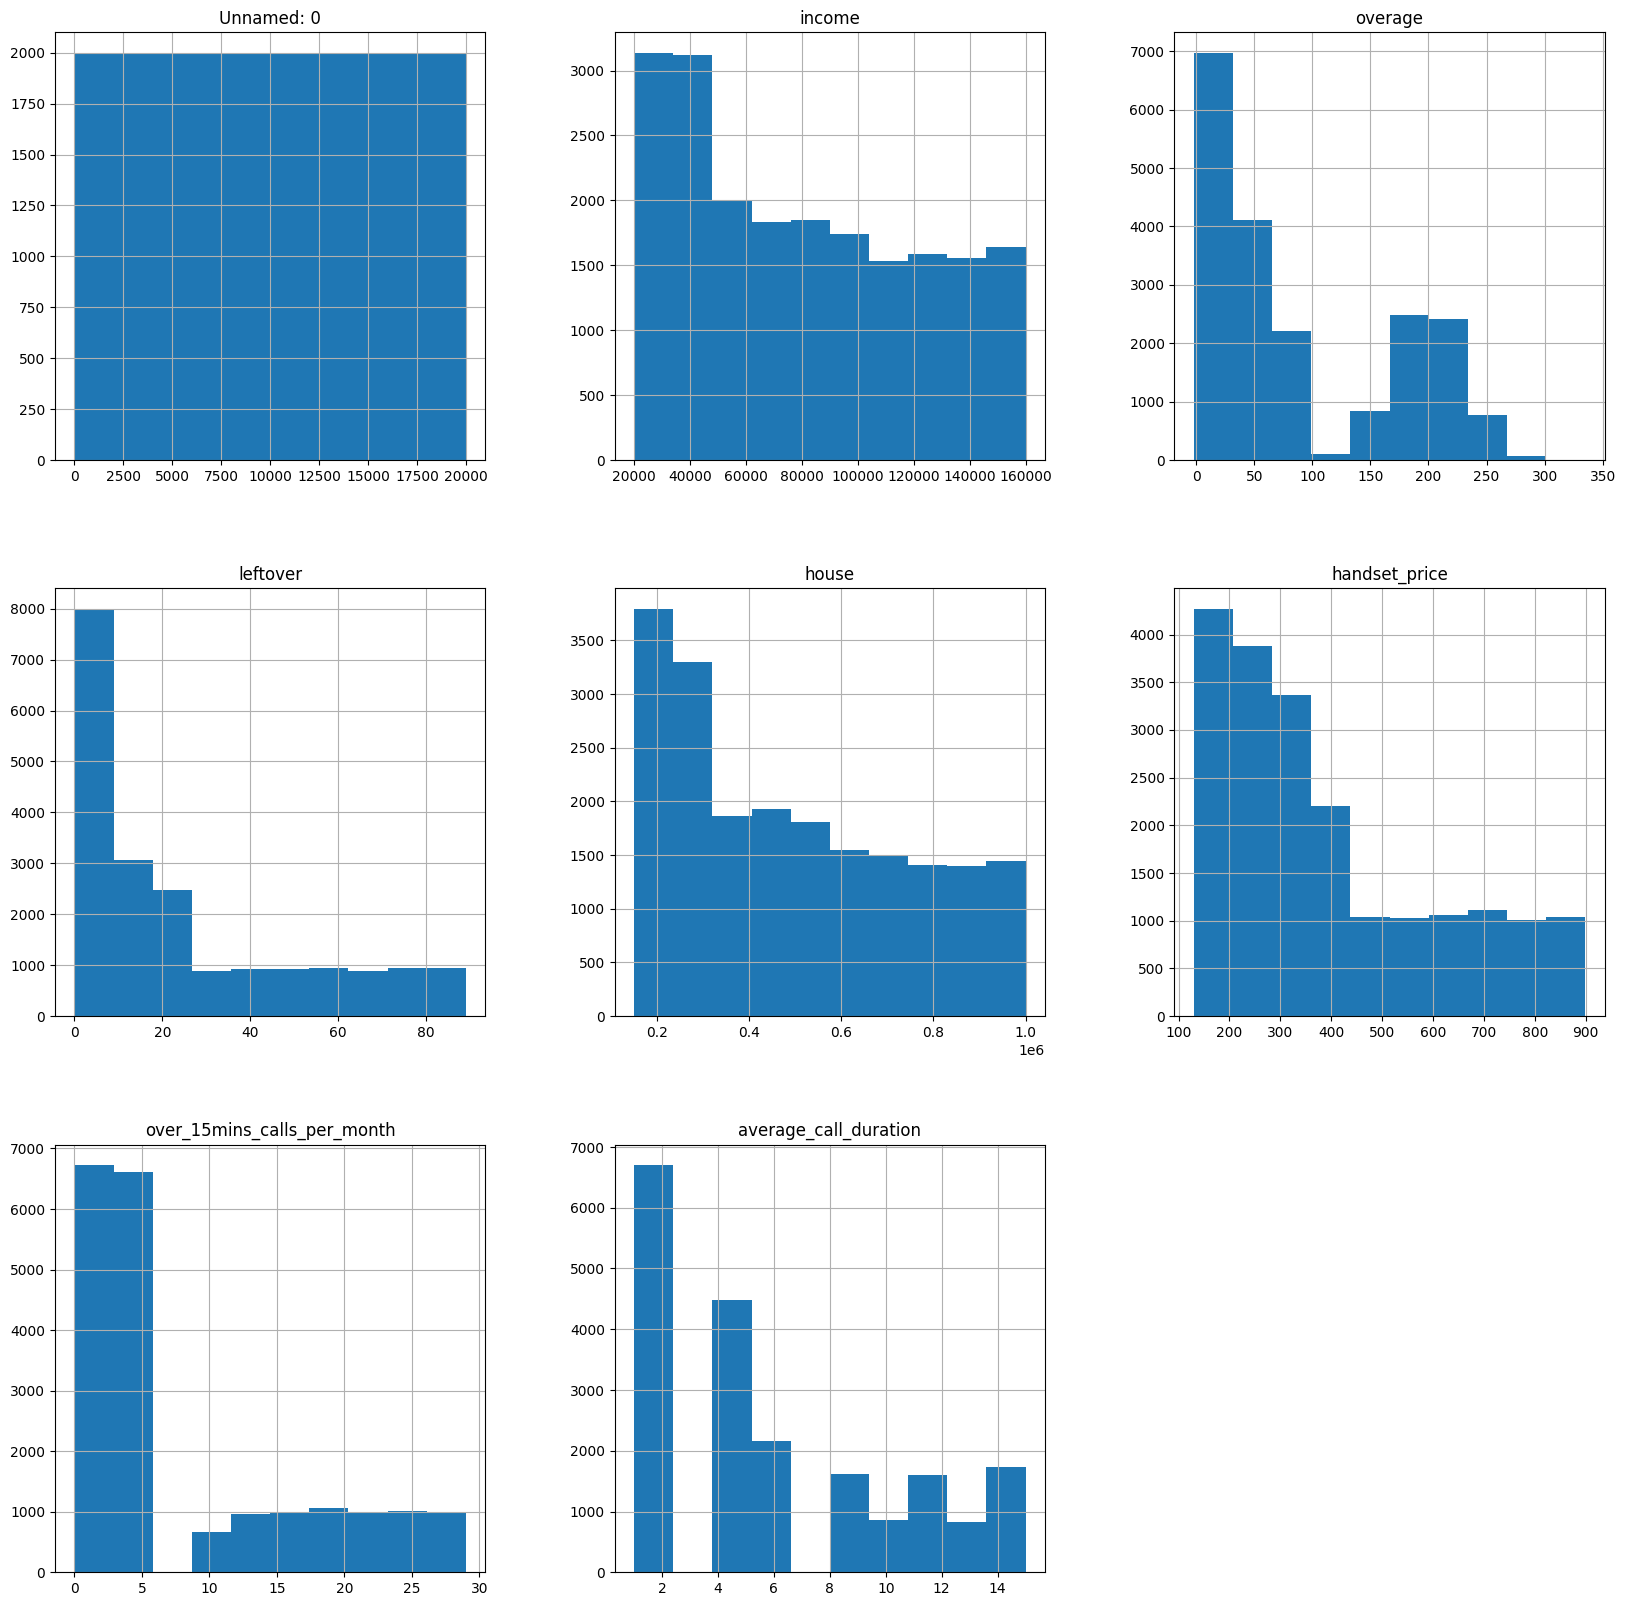

In [ ]:
p = df.hist(figsize = (20,20))

In [ ]:
df.describe()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,10000.50,80281.45,85.98,23.90,493155.26,389.62,8.00,6.00
std,5773.65,41680.59,85.99,26.82,252407.88,213.82,8.93,4.40
min,1.00,20007.00,-2.00,0.00,150002.00,130.00,0.00,1.00
25%,5000.75,42217.00,0.00,0.00,263714.25,219.00,1.00,2.00
50%,10000.50,75366.50,59.00,14.00,452259.50,326.00,4.00,5.00
75%,15000.25,115881.75,179.00,41.00,702378.00,533.25,15.00,10.00
max,20000.00,159983.00,335.00,89.00,999996.00,899.00,29.00,15.00


In [ ]:
df.head()

,Unnamed: 0,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave
0,1,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,reported_satisfaction_unsat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,31953,0,6,313378,161,0,4,True,False,True,...,False,False,True,False,False,False,False,True,False,True
1,36147,0,13,800586,244,0,6,False,False,True,...,False,False,True,False,False,True,False,False,False,True
2,27273,230,0,305049,201,16,15,False,False,True,...,False,False,False,False,True,False,False,False,True,True
3,120070,38,33,788235,780,3,2,True,False,True,...,False,False,False,True,False,True,False,False,False,False
4,29215,208,85,224784,241,21,1,False,False,False,...,True,False,True,False,False,False,True,False,False,True


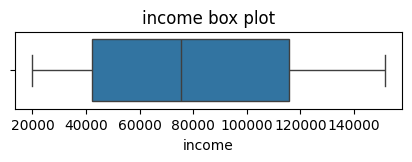

In [ ]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['income'], fliersize=1)
plt.title('income box plot');

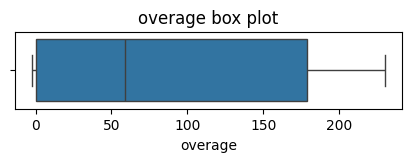

In [ ]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['overage'], fliersize=1)
plt.title('overage box plot');

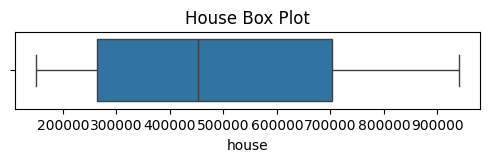

In [ ]:
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['house'], fliersize=1)
plt.title('House Box Plot');


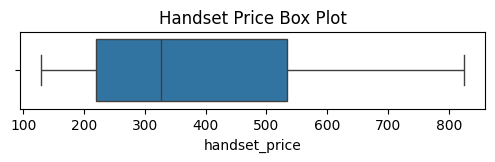

In [ ]:
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['handset_price'], fliersize=1)
plt.title('Handset Price Box Plot');

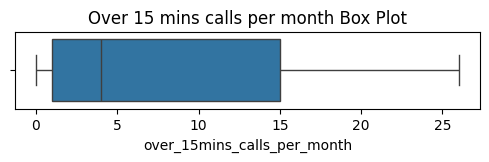

In [ ]:
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['over_15mins_calls_per_month'], fliersize=1)
plt.title('Over 15 mins calls per month Box Plot');

In [ ]:
df.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,80281.45,85.98,23.90,493155.26,389.62,8.00,6.00
std,41680.59,85.99,26.82,252407.88,213.82,8.93,4.40
min,20007.00,-2.00,0.00,150002.00,130.00,0.00,1.00
25%,42217.00,0.00,0.00,263714.25,219.00,1.00,2.00
50%,75366.50,59.00,14.00,452259.50,326.00,4.00,5.00
75%,115881.75,179.00,41.00,702378.00,533.25,15.00,10.00
max,159983.00,335.00,89.00,999996.00,899.00,29.00,15.00


In [ ]:
df = df.drop(columns= 'Unnamed: 0')

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
df.head()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,reported_satisfaction_unsat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,31953,0,6,313378,161,0,4,True,False,True,...,False,False,True,False,False,False,False,True,False,True
1,36147,0,13,800586,244,0,6,False,False,True,...,False,False,True,False,False,True,False,False,False,True
2,27273,230,0,305049,201,16,15,False,False,True,...,False,False,False,False,True,False,False,False,True,True
3,120070,38,33,788235,780,3,2,True,False,True,...,False,False,False,True,False,True,False,False,False,False
4,29215,208,85,224784,241,21,1,False,False,False,...,True,False,True,False,False,False,True,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split


x = df.drop(columns=['leave_STAY'])
y = df.leave_STAY # contains the target variable

xtrain_, xtest_, ytrain_, ytest_ = train_test_split(x, y, test_size=0.2, random_state = 42)

In [ ]:
def get_score(names, models, _X_train, _y_train, _X_test, _y_test, index):
    res = {' ':[index]} # key and a list containing the provided index as the value.
    for n, model in enumerate(models):
      trained = model.fit(_X_train, _y_train)
      score = trained.score(_X_test, _y_test)
      res[names[n]] = score
    df = pd.DataFrame(res).set_index(' ') # Converts the res dictionary into a DataFrame using pandas (pd.DataFrame(res))
    return df



In [ ]:
def get_validators():
  NN = MLPClassifier(max_iter = 1000)
  LR = LogisticRegression(max_iter = 1000)
  SVM = SVC()
  ABC = AdaBoostClassifier()
  GBC = GradientBoostingClassifier()
  KNN = KNeighborsClassifier()
  GNB = GaussianNB()
  ET = ExtraTreesClassifier()
  RF = RandomForestClassifier()
  DT = DecisionTreeClassifier()
  XGB = XGBClassifier()

  return ([     'Neural Network',
                'Logistic Regression',
                'Support Vector Machine',
                'Ada Boost Classifier',
                'Gradient Boosting Classifier',
                'K-Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Extra Trees',
               'Random Forest',
               'Decision Tree',
               'XGB Classifier'],
          [NN, LR, SVM, ABC, GBC, KNN, GNB, ET, RF, DT, XGB])

In [ ]:
names, models = get_validators()
scores = get_score(names, models, xtrain_, ytrain_, xtest_, ytest_, 'Churn_Accu')

scores

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
,,,,,,,,,,,
Churn_Accu,0.55,0.63,0.61,0.67,0.70,0.58,0.64,0.67,0.70,0.62,0.69


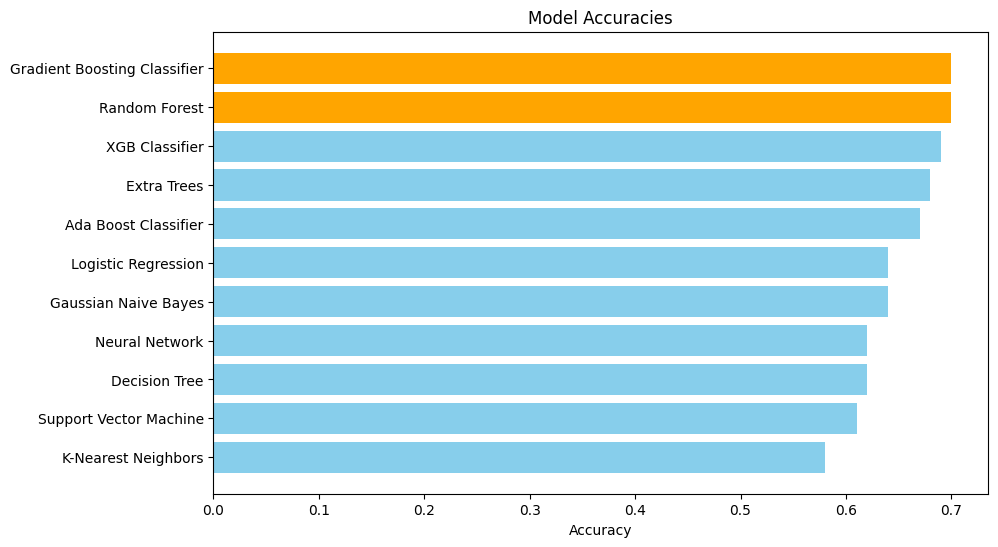

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracy scores
models = [
    'Neural Network', 'Logistic Regression', 'Support Vector Machine',
    'Ada Boost Classifier', 'Gradient Boosting Classifier',
    'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Extra Trees',
    'Random Forest', 'Decision Tree', 'XGB Classifier'
]
accuracies = [
    0.62, 0.64, 0.61, 0.67, 0.70, 0.58, 0.64, 0.68, 0.70, 0.62, 0.69
]

# Sort models and accuracies by accuracy in descending order
sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Highlight the highest accuracy
colors = ['orange' if acc == max(sorted_accuracies) else 'skyblue' for acc in sorted_accuracies]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_models, sorted_accuracies, color=colors)
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis to show highest accuracy on top
plt.show()

# 3RD Experiment (WITH Removing Unnecessary features in datasets, WITH SMOTE TECHNIQUE)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Data Science Masters/2023-2024 Second Sem/Machine Learning/churn.csv'
df = pd.read_csv(path)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [ ]:
df.head()

,Unnamed: 0,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave
0,1,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,1,31953,0,6,313378,161,0,4,True,False,...,False,False,True,False,False,False,False,True,False,True
1,2,36147,0,13,800586,244,0,6,False,False,...,False,False,True,False,False,True,False,False,False,True
2,3,27273,230,0,305049,201,16,15,False,False,...,False,False,False,False,True,False,False,False,True,True
3,4,120070,38,33,788235,780,3,2,True,False,...,False,False,False,True,False,True,False,False,False,False
4,5,29215,208,85,224784,241,21,1,False,False,...,True,False,True,False,False,False,True,False,False,True


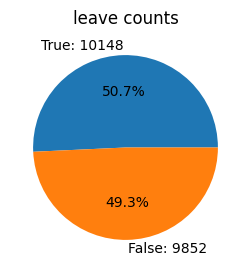

In [ ]:
fig = plt.figure(figsize=(3,3))
data=df['leave_STAY'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('leave counts');

In [ ]:
df.describe()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,10000.50,80281.45,85.98,23.90,493155.26,389.62,8.00,6.00
std,5773.65,41680.59,85.99,26.82,252407.88,213.82,8.93,4.40
min,1.00,20007.00,-2.00,0.00,150002.00,130.00,0.00,1.00
25%,5000.75,42217.00,0.00,0.00,263714.25,219.00,1.00,2.00
50%,10000.50,75366.50,59.00,14.00,452259.50,326.00,4.00,5.00
75%,15000.25,115881.75,179.00,41.00,702378.00,533.25,15.00,10.00
max,20000.00,159983.00,335.00,89.00,999996.00,899.00,29.00,15.00


In [ ]:
df = df.drop(columns= 'Unnamed: 0')

In [ ]:
df.head()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,reported_satisfaction_unsat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,31953,0,6,313378,161,0,4,True,False,True,...,False,False,True,False,False,False,False,True,False,True
1,36147,0,13,800586,244,0,6,False,False,True,...,False,False,True,False,False,True,False,False,False,True
2,27273,230,0,305049,201,16,15,False,False,True,...,False,False,False,False,True,False,False,False,True,True
3,120070,38,33,788235,780,3,2,True,False,True,...,False,False,False,True,False,True,False,False,False,False
4,29215,208,85,224784,241,21,1,False,False,False,...,True,False,True,False,False,False,True,False,False,True


before Counter({True: 10148, False: 9852})
after Counter({True: 10148, False: 10148})


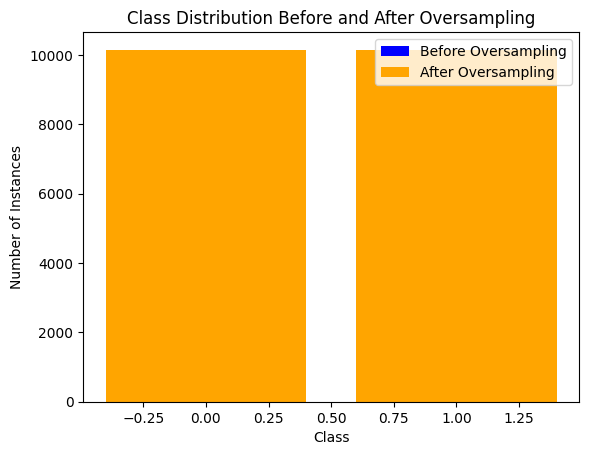

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt


x = df.drop(columns=['leave_STAY'])
y = df.leave_STAY # contains the target variable

# The output will show the class distribution before applying SMOTE.
print('before',Counter(y))

smote = SMOTE()
smotex, smotey = smote.fit_resample(x, y)

print('after', Counter(smotey))

plt.bar(Counter(y).keys(), Counter(y).values(), color='blue', label='Before Oversampling')
plt.bar(Counter(smotey).keys(), Counter(smotey).values(), color='orange', label='After Oversampling')
plt.legend()
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution Before and After Oversampling')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split



xtrain_, xtest_, ytrain_, ytest_ = train_test_split(smotex, smotey, test_size=0.2, random_state = 42)

In [ ]:
def get_score(names, models, _X_train, _y_train, _X_test, _y_test, index):
    res = {' ':[index]} # key and a list containing the provided index as the value.
    for n, model in enumerate(models):
      trained = model.fit(_X_train, _y_train)
      score = trained.score(_X_test, _y_test)
      res[names[n]] = score
    df = pd.DataFrame(res).set_index(' ') # Converts the res dictionary into a DataFrame using pandas (pd.DataFrame(res))
    return df



In [ ]:
def get_validators():
  NN = MLPClassifier(max_iter = 1000)
  LR = LogisticRegression(max_iter = 1000)
  SVM = SVC()
  ABC = AdaBoostClassifier()
  GBC = GradientBoostingClassifier()
  KNN = KNeighborsClassifier()
  GNB = GaussianNB()
  ET = ExtraTreesClassifier()
  RF = RandomForestClassifier()
  DT = DecisionTreeClassifier()
  XGB = XGBClassifier()

  return ([     'Neural Network',
                'Logistic Regression',
                'Support Vector Machine',
                'Ada Boost Classifier',
                'Gradient Boosting Classifier',
                'K-Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Extra Trees',
               'Random Forest',
               'Decision Tree',
               'XGB Classifier'],
          [NN, LR, SVM, ABC, GBC, KNN, GNB, ET, RF, DT, XGB])

In [ ]:
names, models = get_validators()
scores = get_score(names, models, xtrain_, ytrain_, xtest_, ytest_, 'Churn_Accu')

scores

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
,,,,,,,,,,,
Churn_Accu,0.59,0.63,0.62,0.67,0.71,0.60,0.63,0.67,0.70,0.62,0.70


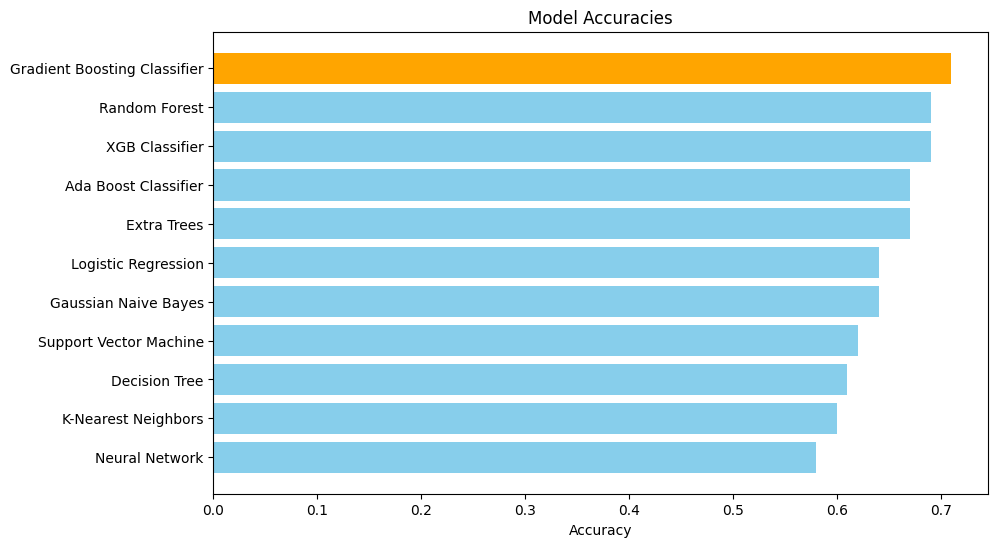

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracy scores
models = [
    'Neural Network', 'Logistic Regression', 'Support Vector Machine',
    'Ada Boost Classifier', 'Gradient Boosting Classifier',
    'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Extra Trees',
    'Random Forest', 'Decision Tree', 'XGB Classifier'
]
accuracies = [
    0.58, 0.64, 0.62, 0.67, 0.71, 0.60, 0.64, 0.67, 0.69, 0.61, 0.69
]

# Sort models and accuracies by accuracy in descending order
sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Highlight the highest accuracy
colors = ['orange' if acc == max(sorted_accuracies) else 'skyblue' for acc in sorted_accuracies]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_models, sorted_accuracies, color=colors)
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis to show highest accuracy on top
plt.show()

# 4th Experiment (WITH and Removing Unnecessary features in datasets, WITH SMOTE TECHNIQUE, Normalization Technique, Standard Scalar)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Data Science Masters/2023-2024 Second Sem/Machine Learning/churn.csv'
df = pd.read_csv(path)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [ ]:
df.head()

,Unnamed: 0,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave
0,1,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,1,31953,0,6,313378,161,0,4,True,False,...,False,False,True,False,False,False,False,True,False,True
1,2,36147,0,13,800586,244,0,6,False,False,...,False,False,True,False,False,True,False,False,False,True
2,3,27273,230,0,305049,201,16,15,False,False,...,False,False,False,False,True,False,False,False,True,True
3,4,120070,38,33,788235,780,3,2,True,False,...,False,False,False,True,False,True,False,False,False,False
4,5,29215,208,85,224784,241,21,1,False,False,...,True,False,True,False,False,False,True,False,False,True


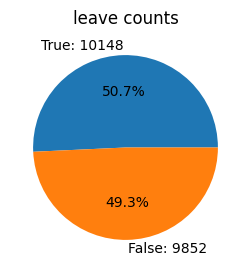

In [ ]:
fig = plt.figure(figsize=(3,3))
data=df['leave_STAY'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('leave counts');

In [ ]:
df.describe()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,10000.50,80281.45,85.98,23.90,493155.26,389.62,8.00,6.00
std,5773.65,41680.59,85.99,26.82,252407.88,213.82,8.93,4.40
min,1.00,20007.00,-2.00,0.00,150002.00,130.00,0.00,1.00
25%,5000.75,42217.00,0.00,0.00,263714.25,219.00,1.00,2.00
50%,10000.50,75366.50,59.00,14.00,452259.50,326.00,4.00,5.00
75%,15000.25,115881.75,179.00,41.00,702378.00,533.25,15.00,10.00
max,20000.00,159983.00,335.00,89.00,999996.00,899.00,29.00,15.00


In [ ]:
df.head()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,1,31953,0,6,313378,161,0,4,True,False,...,False,False,True,False,False,False,False,True,False,True
1,2,36147,0,13,800586,244,0,6,False,False,...,False,False,True,False,False,True,False,False,False,True
2,3,27273,230,0,305049,201,16,15,False,False,...,False,False,False,False,True,False,False,False,True,True
3,4,120070,38,33,788235,780,3,2,True,False,...,False,False,False,True,False,True,False,False,False,False
4,5,29215,208,85,224784,241,21,1,False,False,...,True,False,True,False,False,False,True,False,False,True


before Counter({True: 10148, False: 9852})
after Counter({True: 10148, False: 10148})


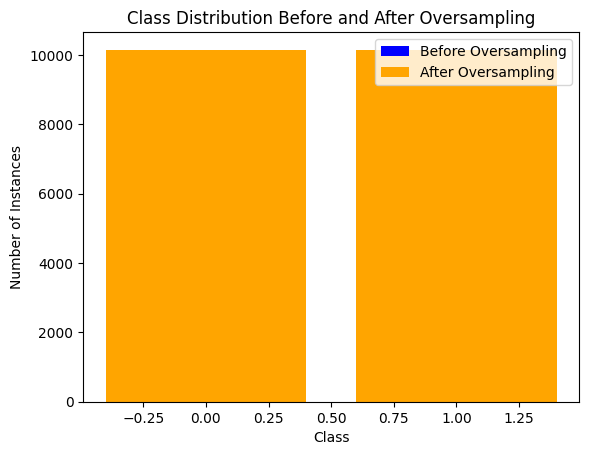

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt


x = df.drop(columns=['leave_STAY'])
y = df.leave_STAY # contains the target variable

# The output will show the class distribution before applying SMOTE.
print('before',Counter(y))

smote = SMOTE()
smotex, smotey = smote.fit_resample(x, y)

print('after', Counter(smotey))

plt.bar(Counter(y).keys(), Counter(y).values(), color='blue', label='Before Oversampling')
plt.bar(Counter(smotey).keys(), Counter(smotey).values(), color='orange', label='After Oversampling')
plt.legend()
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution Before and After Oversampling')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in x:
  smotex[col] = smotex[col].astype(float)
  smotex[[col]] = scaler.fit_transform(smotex[[col]])

smotex.head()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,...,reported_satisfaction_very_sat,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps
0,-1.73,-1.16,-1.00,-0.67,-0.71,-1.07,-0.90,-0.45,1.01,-0.23,...,-0.58,-0.80,-0.33,1.25,-0.58,-0.50,-0.80,-0.33,2.00,-0.23
1,-1.73,-1.06,-1.00,-0.41,1.22,-0.68,-0.90,0.00,-0.99,-0.23,...,-0.58,-0.80,-0.33,1.25,-0.58,-0.50,1.24,-0.33,-0.50,-0.23
2,-1.73,-1.27,1.67,-0.89,-0.74,-0.89,0.90,2.05,-0.99,-0.23,...,-0.58,-0.80,-0.33,-0.80,-0.58,2.01,-0.80,-0.33,-0.50,4.27
3,-1.73,0.95,-0.56,0.34,1.17,1.82,-0.56,-0.91,1.01,-0.23,...,-0.58,-0.80,-0.33,-0.80,1.72,-0.50,1.24,-0.33,-0.50,-0.23
4,-1.73,-1.23,1.42,2.28,-1.06,-0.70,1.46,-1.14,-0.99,-0.23,...,-0.58,1.24,-0.33,1.25,-0.58,-0.50,-0.80,3.03,-0.50,-0.23


In [ ]:
from sklearn.model_selection import train_test_split



xtrain_, xtest_, ytrain_, ytest_ = train_test_split(smotex, smotey, test_size=0.2, random_state = 42)

In [ ]:
def get_score(names, models, _X_train, _y_train, _X_test, _y_test, index):
    res = {' ':[index]} # key and a list containing the provided index as the value.
    for n, model in enumerate(models):
      trained = model.fit(_X_train, _y_train)
      score = trained.score(_X_test, _y_test)
      res[names[n]] = score
    df = pd.DataFrame(res).set_index(' ') # Converts the res dictionary into a DataFrame using pandas (pd.DataFrame(res))
    return df



In [ ]:
def get_validators():
  NN = MLPClassifier(max_iter = 1000)
  LR = LogisticRegression(max_iter = 1000)
  SVM = SVC()
  ABC = AdaBoostClassifier()
  GBC = GradientBoostingClassifier()
  KNN = KNeighborsClassifier()
  GNB = GaussianNB()
  ET = ExtraTreesClassifier()
  RF = RandomForestClassifier()
  DT = DecisionTreeClassifier()
  XGB = XGBClassifier()

  return ([     'Neural Network',
                'Logistic Regression',
                'Support Vector Machine',
                'Ada Boost Classifier',
                'Gradient Boosting Classifier',
                'K-Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Extra Trees',
               'Random Forest',
               'Decision Tree',
               'XGB Classifier'],
          [NN, LR, SVM, ABC, GBC, KNN, GNB, ET, RF, DT, XGB])

In [ ]:
names, models = get_validators()
scores = get_score(names, models, xtrain_, ytrain_, xtest_, ytest_, 'Churn_Accu')

scores

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
,,,,,,,,,,,
Churn_Accu,0.64,0.65,0.67,0.67,0.71,0.62,0.62,0.67,0.70,0.61,0.70


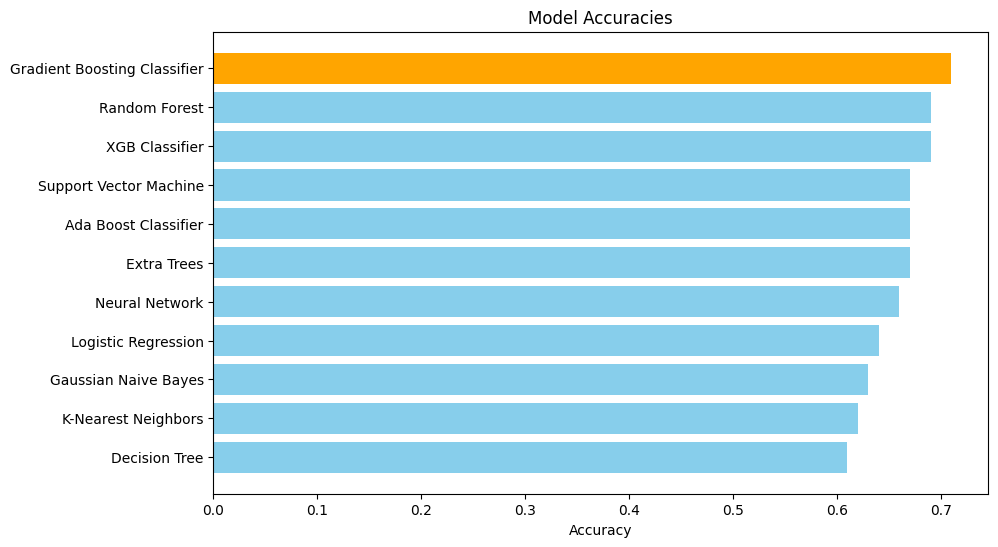

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracy scores
models = [
    'Neural Network', 'Logistic Regression', 'Support Vector Machine',
    'Ada Boost Classifier', 'Gradient Boosting Classifier',
    'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Extra Trees',
    'Random Forest', 'Decision Tree', 'XGB Classifier'
]
accuracies = [
    0.66, 0.64, 0.67, 0.67, 0.71, 0.62, 0.63, 0.67, 0.69, 0.61, 0.69
]

# Sort models and accuracies by accuracy in descending order
sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Highlight the highest accuracy
colors = ['orange' if acc == max(sorted_accuracies) else 'skyblue' for acc in sorted_accuracies]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_models, sorted_accuracies, color=colors)
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis to show highest accuracy on top
plt.show()

# 5th Experiment (WITH Removing Outliers and Removing Unnecessary features in datasets, WITH SMOTE TECHNIQUE, Normalization Technique, Standard Scalar, WITH Cross Validation)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Data Science Masters/2023-2024 Second Sem/Machine Learning/churn.csv'
df = pd.read_csv(path)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [ ]:
df.head()

,Unnamed: 0,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave
0,1,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,1,31953,0,6,313378,161,0,4,True,False,...,False,False,True,False,False,False,False,True,False,True
1,2,36147,0,13,800586,244,0,6,False,False,...,False,False,True,False,False,True,False,False,False,True
2,3,27273,230,0,305049,201,16,15,False,False,...,False,False,False,False,True,False,False,False,True,True
3,4,120070,38,33,788235,780,3,2,True,False,...,False,False,False,True,False,True,False,False,False,False
4,5,29215,208,85,224784,241,21,1,False,False,...,True,False,True,False,False,False,True,False,False,True


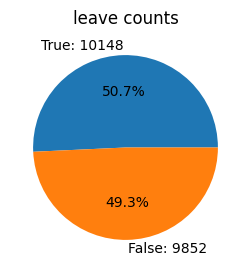

In [ ]:
fig = plt.figure(figsize=(3,3))
data=df['leave_STAY'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('leave counts');

In [ ]:
df.head()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,...,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps,leave_STAY
0,1,31953,0,6,313378,161,0,4,True,False,...,False,False,True,False,False,False,False,True,False,True
1,2,36147,0,13,800586,244,0,6,False,False,...,False,False,True,False,False,True,False,False,False,True
2,3,27273,230,0,305049,201,16,15,False,False,...,False,False,False,False,True,False,False,False,True,True
3,4,120070,38,33,788235,780,3,2,True,False,...,False,False,False,True,False,True,False,False,False,False
4,5,29215,208,85,224784,241,21,1,False,False,...,True,False,True,False,False,False,True,False,False,True


before Counter({True: 10148, False: 9852})
after Counter({True: 10148, False: 10148})


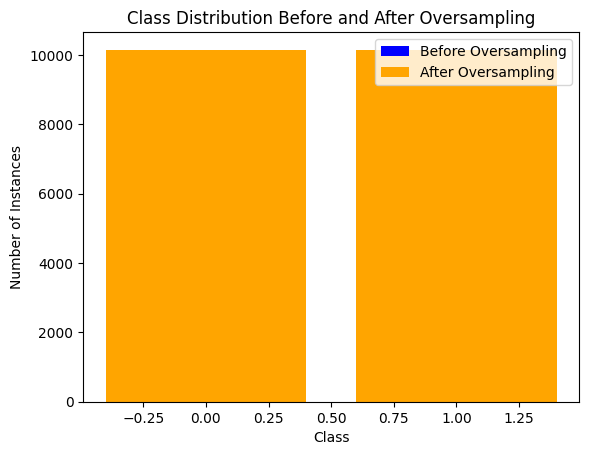

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt


x = df.drop(columns=['leave_STAY'])
y = df.leave_STAY # contains the target variable

# The output will show the class distribution before applying SMOTE.
print('before',Counter(y))

smote = SMOTE()
smotex, smotey = smote.fit_resample(x, y)

print('after', Counter(smotey))

plt.bar(Counter(y).keys(), Counter(y).values(), color='blue', label='Before Oversampling')
plt.bar(Counter(smotey).keys(), Counter(smotey).values(), color='orange', label='After Oversampling')
plt.legend()
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution Before and After Oversampling')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in x:
  smotex[col] = smotex[col].astype(float)
  smotex[[col]] = scaler.fit_transform(smotex[[col]])

smotex.head()

,Unnamed: 0,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,college_zero,reported_satisfaction_sat,...,reported_satisfaction_very_sat,reported_satisfaction_very_unsat,reported_usage_level_high,reported_usage_level_little,reported_usage_level_very_high,reported_usage_level_very_little,considering_change_of_plan_considering,considering_change_of_plan_never_thought,considering_change_of_plan_no,considering_change_of_plan_perhaps
0,-1.73,-1.16,-1.01,-0.67,-0.71,-1.07,-0.90,-0.45,1.01,-0.23,...,-0.58,-0.80,-0.33,1.25,-0.58,-0.50,-0.80,-0.33,2.00,-0.23
1,-1.73,-1.06,-1.01,-0.41,1.22,-0.68,-0.90,0.00,-0.99,-0.23,...,-0.58,-0.80,-0.33,1.25,-0.58,-0.50,1.25,-0.33,-0.50,-0.23
2,-1.73,-1.27,1.67,-0.89,-0.74,-0.88,0.89,2.05,-0.99,-0.23,...,-0.58,-0.80,-0.33,-0.80,-0.58,2.01,-0.80,-0.33,-0.50,4.27
3,-1.73,0.95,-0.56,0.34,1.17,1.82,-0.56,-0.91,1.01,-0.23,...,-0.58,-0.80,-0.33,-0.80,1.72,-0.50,1.25,-0.33,-0.50,-0.23
4,-1.73,-1.23,1.42,2.28,-1.06,-0.70,1.45,-1.14,-0.99,-0.23,...,-0.58,1.24,-0.33,1.25,-0.58,-0.50,-0.80,3.02,-0.50,-0.23


In [ ]:
from sklearn.model_selection import train_test_split



xtrain_, xtest_, ytrain_, ytest_ = train_test_split(smotex, smotey, test_size=0.2, random_state = 42)

In [ ]:
def get_score(names, models, _X_train, _y_train, _X_test, _y_test, index):
    res = {' ':[index]} # key and a list containing the provided index as the value.
    for n, model in enumerate(models):
      trained = model.fit(_X_train, _y_train)
      score = trained.score(_X_test, _y_test)
      res[names[n]] = score
    df = pd.DataFrame(res).set_index(' ') # Converts the res dictionary into a DataFrame using pandas (pd.DataFrame(res))
    return df



In [ ]:
def get_validators():
  NN = MLPClassifier(max_iter = 1000)
  LR = LogisticRegression(max_iter = 1000)
  SVM = SVC()
  ABC = AdaBoostClassifier()
  GBC = GradientBoostingClassifier()
  KNN = KNeighborsClassifier()
  GNB = GaussianNB()
  ET = ExtraTreesClassifier()
  RF = RandomForestClassifier()
  DT = DecisionTreeClassifier()
  XGB = XGBClassifier()

  return ([     'Neural Network',
                'Logistic Regression',
                'Support Vector Machine',
                'Ada Boost Classifier',
                'Gradient Boosting Classifier',
                'K-Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Extra Trees',
               'Random Forest',
               'Decision Tree',
               'XGB Classifier'],
          [NN, LR, SVM, ABC, GBC, KNN, GNB, ET, RF, DT, XGB])

In [ ]:
names, models = get_validators()
scores = get_score(names, models, xtrain_, ytrain_, xtest_, ytest_, 'Churn_Accu')

scores

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
,,,,,,,,,,,
Churn_Accu,0.65,0.65,0.67,0.67,0.71,0.62,0.62,0.68,0.70,0.62,0.69


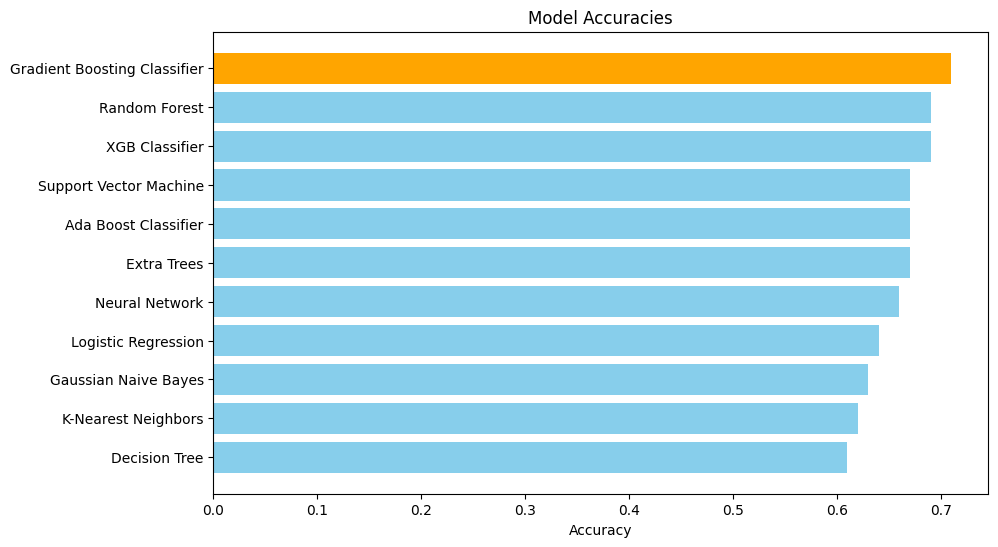

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracy scores
models = [
    'Neural Network', 'Logistic Regression', 'Support Vector Machine',
    'Ada Boost Classifier', 'Gradient Boosting Classifier',
    'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Extra Trees',
    'Random Forest', 'Decision Tree', 'XGB Classifier'
]
accuracies = [
    0.66, 0.64, 0.67, 0.67, 0.71, 0.62, 0.63, 0.67, 0.69, 0.61, 0.69
]

# Sort models and accuracies by accuracy in descending order
sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Highlight the highest accuracy
colors = ['orange' if acc == max(sorted_accuracies) else 'skyblue' for acc in sorted_accuracies]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_models, sorted_accuracies, color=colors)
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis to show highest accuracy on top
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( smotex, smotey, test_size = 0.2 )

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

In [ ]:
def cross_validate(names, models, _X_train, _y_train, index, cv=10):
  res = []
  for model in models:
    draft = model_selection.cross_val_score(model, _X_train, _y_train, cv=cv)
    res.append(draft)
  index = [index+' CV_' + str(i) for i in range(cv)]
  accuracy = pd.DataFrame(np.array(res).T,
                          columns=names,
                          index=index,
                          ).round(decimals=3)
  return accuracy

In [ ]:
model_names, models = get_validators()
accuracy = cross_validate(model_names, models, xtrain, ytrain, 'Churn_CV')
accuracy

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
Churn_CV CV_0,0.64,0.64,0.67,0.66,0.69,0.61,0.62,0.68,0.69,0.62,0.69
Churn_CV CV_1,0.65,0.65,0.70,0.68,0.72,0.63,0.64,0.70,0.72,0.63,0.71
Churn_CV CV_2,0.65,0.65,0.66,0.67,0.69,0.60,0.62,0.67,0.70,0.62,0.68
Churn_CV CV_3,0.64,0.64,0.66,0.67,0.70,0.61,0.63,0.68,0.69,0.61,0.68
Churn_CV CV_4,0.63,0.64,0.66,0.66,0.70,0.60,0.63,0.67,0.69,0.60,0.68
Churn_CV CV_5,0.66,0.65,0.68,0.68,0.71,0.64,0.64,0.69,0.71,0.61,0.70
Churn_CV CV_6,0.64,0.64,0.68,0.66,0.71,0.60,0.63,0.69,0.71,0.62,0.70
Churn_CV CV_7,0.65,0.62,0.66,0.64,0.69,0.60,0.63,0.67,0.70,0.61,0.67
Churn_CV CV_8,0.65,0.63,0.66,0.67,0.68,0.62,0.63,0.68,0.69,0.60,0.68
Churn_CV CV_9,0.64,0.64,0.67,0.66,0.70,0.60,0.62,0.67,0.69,0.62,0.69


In [ ]:

import numpy as np

# Accuracy scores for each algorithm
accuracy_scores = {
    'Neural Network': [0.64, 0.65, 0.65, 0.64, 0.63, 0.66, 0.64, 0.65, 0.65, 0.64],
    'Logistic Regression': [0.64, 0.65, 0.65, 0.64, 0.64, 0.65, 0.64, 0.62, 0.63, 0.64],
    'Support Vector Machine': [0.67, 0.70, 0.66, 0.66, 0.66, 0.68, 0.68, 0.66, 0.66, 0.67],
    'Ada Boost Classifier': [0.66, 0.68, 0.67, 0.67, 0.66, 0.68, 0.66, 0.64, 0.67, 0.66],
    'Gradient Boosting Classifier': [0.69, 0.72, 0.69, 0.70, 0.70, 0.71, 0.71, 0.69, 0.68, 0.70],
    'K-Nearest Neighbors': [0.61, 0.63, 0.60, 0.61, 0.60, 0.64, 0.60, 0.60, 0.62, 0.60],
    'Gaussian Naive Bayes': [0.62, 0.64, 0.62, 0.63, 0.63, 0.64, 0.63, 0.63, 0.63, 0.62],
    'Extra Trees': [0.68, 0.70, 0.67, 0.68, 0.67, 0.69, 0.69, 0.67, 0.68, 0.67],
    'Random Forest': [0.69, 0.72, 0.70, 0.69, 0.69, 0.71, 0.71, 0.70, 0.69, 0.69],
    'Decision Tree': [0.62, 0.63, 0.62, 0.61, 0.60, 0.61, 0.62, 0.61, 0.60, 0.62],
    'XGB Classifier': [0.69, 0.71, 0.68, 0.68, 0.68, 0.70, 0.70, 0.67, 0.68, 0.69]
}

# Compute mean accuracy for each algorithm
mean_accuracies = {algo: np.mean(scores) for algo, scores in accuracy_scores.items()}

# Display mean accuracies
for algo, mean_accuracy in mean_accuracies.items():
    print(f"{algo}: {mean_accuracy:.2f}")

Neural Network: 0.65
Logistic Regression: 0.64
Support Vector Machine: 0.67
Ada Boost Classifier: 0.67
Gradient Boosting Classifier: 0.70
K-Nearest Neighbors: 0.61
Gaussian Naive Bayes: 0.63
Extra Trees: 0.68
Random Forest: 0.70
Decision Tree: 0.61
XGB Classifier: 0.69


In [ ]:
import statistics

data = {
    'Neural Network': [0.65, 0.65, 0.65, 0.66, 0.67, 0.66, 0.66, 0.65, 0.64, 0.64],
    'Logistic Regression': [0.65, 0.64, 0.66, 0.64, 0.65, 0.63, 0.63, 0.64, 0.64, 0.63],
    'Support Vector Machine': [0.65, 0.67, 0.69, 0.67, 0.67, 0.67, 0.67, 0.67, 0.66, 0.65],
    'Ada Boost Classifier': [0.65, 0.67, 0.68, 0.66, 0.67, 0.68, 0.67, 0.66, 0.67, 0.66],
    'Gradient Boosting Classifier': [0.69, 0.70, 0.72, 0.71, 0.70, 0.72, 0.71, 0.70, 0.68, 0.71],
    'K-Nearest Neighbors': [0.61, 0.60, 0.63, 0.62, 0.62, 0.62, 0.62, 0.61, 0.60, 0.61],
    'Gaussian Naive Bayes': [0.62, 0.62, 0.64, 0.63, 0.64, 0.61, 0.61, 0.63, 0.63, 0.62],
    'Extra Trees': [0.66, 0.69, 0.70, 0.67, 0.67, 0.68, 0.69, 0.66, 0.66, 0.67],
    'Random Forest': [0.69, 0.70, 0.71, 0.70, 0.71, 0.71, 0.70, 0.69, 0.68, 0.70],
    'Decision Tree': [0.62, 0.63, 0.61, 0.62, 0.61, 0.62, 0.62, 0.63, 0.62, 0.63],
    'XGB Classifier': [0.68, 0.70, 0.70, 0.69, 0.69, 0.71, 0.71, 0.70, 0.68, 0.69]
}

for algo, scores in data.items():
    std_dev = statistics.stdev(scores)
    print(f"Standard deviation of {algo}: {std_dev:.4f}")

Standard deviation of Neural Network: 0.0095
Standard deviation of Logistic Regression: 0.0099
Standard deviation of Support Vector Machine: 0.0116
Standard deviation of Ada Boost Classifier: 0.0095
Standard deviation of Gradient Boosting Classifier: 0.0126
Standard deviation of K-Nearest Neighbors: 0.0097
Standard deviation of Gaussian Naive Bayes: 0.0108
Standard deviation of Extra Trees: 0.0143
Standard deviation of Random Forest: 0.0099
Standard deviation of Decision Tree: 0.0074
Standard deviation of XGB Classifier: 0.0108


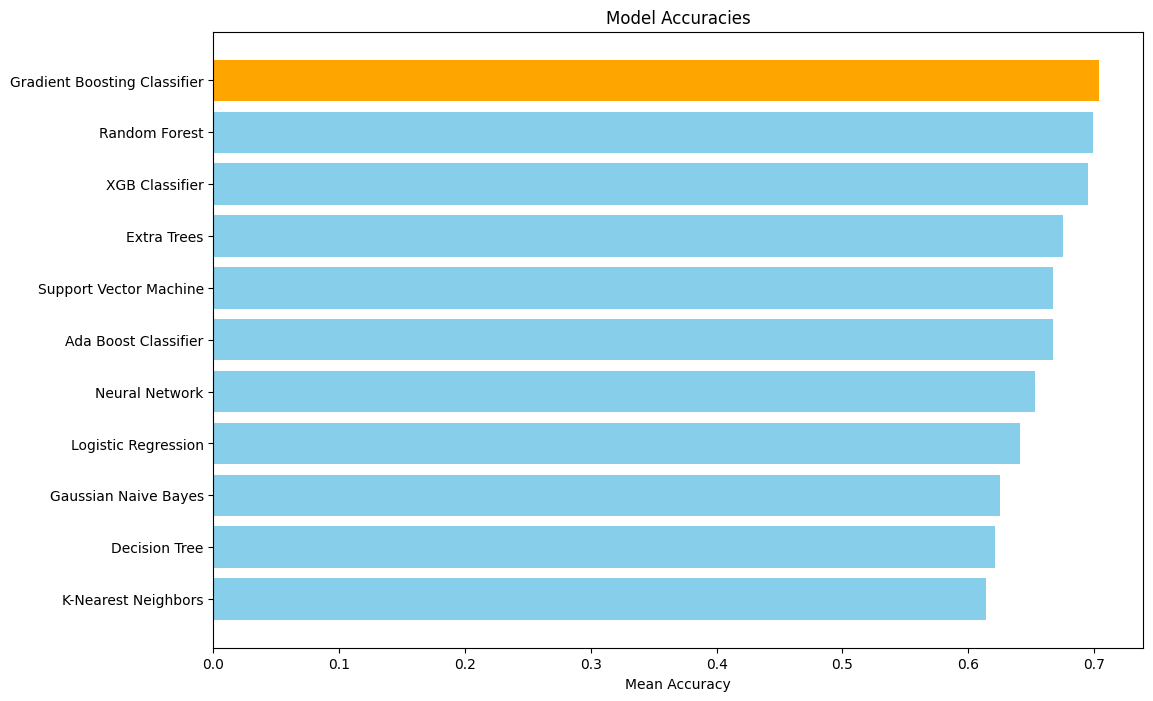

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    'Neural Network': [0.65, 0.65, 0.65, 0.66, 0.67, 0.66, 0.66, 0.65, 0.64, 0.64],
    'Logistic Regression': [0.65, 0.64, 0.66, 0.64, 0.65, 0.63, 0.63, 0.64, 0.64, 0.63],
    'Support Vector Machine': [0.65, 0.67, 0.69, 0.67, 0.67, 0.67, 0.67, 0.67, 0.66, 0.65],
    'Ada Boost Classifier': [0.65, 0.67, 0.68, 0.66, 0.67, 0.68, 0.67, 0.66, 0.67, 0.66],
    'Gradient Boosting Classifier': [0.69, 0.70, 0.72, 0.71, 0.70, 0.72, 0.71, 0.70, 0.68, 0.71],
    'K-Nearest Neighbors': [0.61, 0.60, 0.63, 0.62, 0.62, 0.62, 0.62, 0.61, 0.60, 0.61],
    'Gaussian Naive Bayes': [0.62, 0.62, 0.64, 0.63, 0.64, 0.61, 0.61, 0.63, 0.63, 0.62],
    'Extra Trees': [0.66, 0.69, 0.70, 0.67, 0.67, 0.68, 0.69, 0.66, 0.66, 0.67],
    'Random Forest': [0.69, 0.70, 0.71, 0.70, 0.71, 0.71, 0.70, 0.69, 0.68, 0.70],
    'Decision Tree': [0.62, 0.63, 0.61, 0.62, 0.61, 0.62, 0.62, 0.63, 0.62, 0.63],
    'XGB Classifier': [0.68, 0.70, 0.70, 0.69, 0.69, 0.71, 0.71, 0.70, 0.68, 0.69]
}

# Calculate mean accuracies
mean_accuracies = {model: np.mean(acc) for model, acc in data.items()}

# Sort models by mean accuracy in descending order
sorted_models = sorted(mean_accuracies.keys(), key=lambda x: mean_accuracies[x], reverse=True)
sorted_mean_accuracies = [mean_accuracies[model] for model in sorted_models]

# Highlight the highest accuracy
colors = ['orange' if acc == max(sorted_mean_accuracies) else 'skyblue' for acc in sorted_mean_accuracies]

# Create bar plot
plt.figure(figsize=(12, 8))
plt.barh(sorted_models, sorted_mean_accuracies, color=colors)
plt.xlabel('Mean Accuracy')
plt.title('Model Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis to show highest accuracy on top
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from scipy.stats import uniform, randint



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Neural Network': MLPClassifier(max_iter=200),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Ada Boost Classifier': AdaBoostClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Extra Trees': ExtraTreesClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGB Classifier': XGBClassifier()
}

# Define smaller hyperparameter grids
param_distributions = {
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,)],
        'activation': ['logistic', 'relu'],
        'alpha': uniform(0.0001, 0.001)
    },
    'Logistic Regression': {
        'C': uniform(0.001, 1),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'Support Vector Machine': {
        'C': uniform(0.001, 1),
        'kernel': ['linear', 'rbf']
    },
    'Ada Boost Classifier': {
        'n_estimators': randint(50, 200),
        'learning_rate': uniform(0.01, 1)
    },
    'Gradient Boosting Classifier': {
        'n_estimators': randint(50, 200),
        'learning_rate': uniform(0.01, 1),
        'max_depth': randint(3, 5)
    },
    'K-Nearest Neighbors': {
        'n_neighbors': randint(3, 10),
        'weights': ['uniform', 'distance']
    },
    'Extra Trees': {
        'n_estimators': randint(50, 200),
        'max_depth': randint(5, 10)
    },
    'Random Forest': {
        'n_estimators': randint(50, 200),
        'max_depth': randint(5, 10)
    },
    'Decision Tree': {
        'max_depth': randint(5, 10)
    },
    'XGB Classifier': {
        'n_estimators': randint(50, 200),
        'learning_rate': uniform(0.01, 1),
        'max_depth': randint(3, 5)
    }
}

# Perform randomized search for each model
best_models = {}
for model_name, model in models.items():
    if model_name in param_distributions:
        print(f"Tuning {model_name}...")
        randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions[model_name], n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
        randomized_search.fit(X_train, y_train)
        best_models[model_name] = randomized_search.best_estimator_
        print(f"Best Hyperparameters for {model_name}: {randomized_search.best_params_}")
        print(f"Best CV Score for {model_name}: {randomized_search.best_score_}")
    else:
        print(f"Skipping {model_name} as it has no hyperparameters to tune.")
        best_models[model_name] = model
        best_models[model_name].fit(X_train, y_train)

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    test_score = model.score(X_test, y_test)
    print(f"Test Accuracy for {model_name}: {test_score}")

Tuning Neural Network...
Best Hyperparameters for Neural Network: {'activation': 'relu', 'alpha': 0.000711653160488281, 'hidden_layer_sizes': (50,)}
Best CV Score for Neural Network: 0.6225616767902138
Tuning Logistic Regression...
Best Hyperparameters for Logistic Regression: {'C': 0.5996584841970366, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score for Logistic Regression: 0.6398751182728822
Tuning Support Vector Machine...


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models with default parameters
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Ada Boost Classifier': AdaBoostClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Extra Trees': ExtraTreesClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGB Classifier': XGBClassifier()
}

# Define smaller hyperparameter grids
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1]},
    'Support Vector Machine': {'C': [0.001, 0.01, 0.1, 1]},
    'Ada Boost Classifier': {'n_estimators': [50, 100, 200]},
    'Gradient Boosting Classifier': {'n_estimators': [50, 100, 200]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 10]},
    'Extra Trees': {'n_estimators': [50, 100, 200]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'XGB Classifier': {'n_estimators': [50, 100, 200]}
}

# Perform grid search for each model
best_models = {}
for model_name, model in models.items():
    if model_name in param_grids:
        print(f"Tuning {model_name}...")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=3, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best Hyperparameters for {model_name}: {grid_search.best_params_}")
    else:
        print(f"Skipping {model_name} as it has no hyperparameters to tune.")
        best_models[model_name] = model
        best_models[model_name].fit(X_train, y_train)

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    test_score = model.score(X_test, y_test)
    print(f"Test Accuracy for {model_name}: {test_score}")

Tuning Logistic Regression...
Best Hyperparameters for Logistic Regression: {'C': 1}
Tuning Support Vector Machine...
Best Hyperparameters for Support Vector Machine: {'C': 1}
Tuning Ada Boost Classifier...
Best Hyperparameters for Ada Boost Classifier: {'n_estimators': 50}
Tuning Gradient Boosting Classifier...
Best Hyperparameters for Gradient Boosting Classifier: {'n_estimators': 100}
Tuning K-Nearest Neighbors...
Best Hyperparameters for K-Nearest Neighbors: {'n_neighbors': 10}
Skipping Gaussian Naive Bayes as it has no hyperparameters to tune.
Tuning Extra Trees...
Best Hyperparameters for Extra Trees: {'n_estimators': 100}
Tuning Random Forest...
Best Hyperparameters for Random Forest: {'n_estimators': 200}
Tuning Decision Tree...
Best Hyperparameters for Decision Tree: {'max_depth': 5}
Tuning XGB Classifier...
Best Hyperparameters for XGB Classifier: {'n_estimators': 50}
Test Accuracy for Logistic Regression: 0.63775
Test Accuracy for Support Vector Machine: 0.6115
Test Accuracy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 3. Define neural network model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

# Define a smaller hyperparameter grid
param_grid = {
    'alpha': [0.0001, 0.001],
}

# Perform grid search with reduced parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit grid search to data
grid_search.fit(X_train, y_train)

# Make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.48625


# CONCLUSION WITH THE EXPERIMENTS

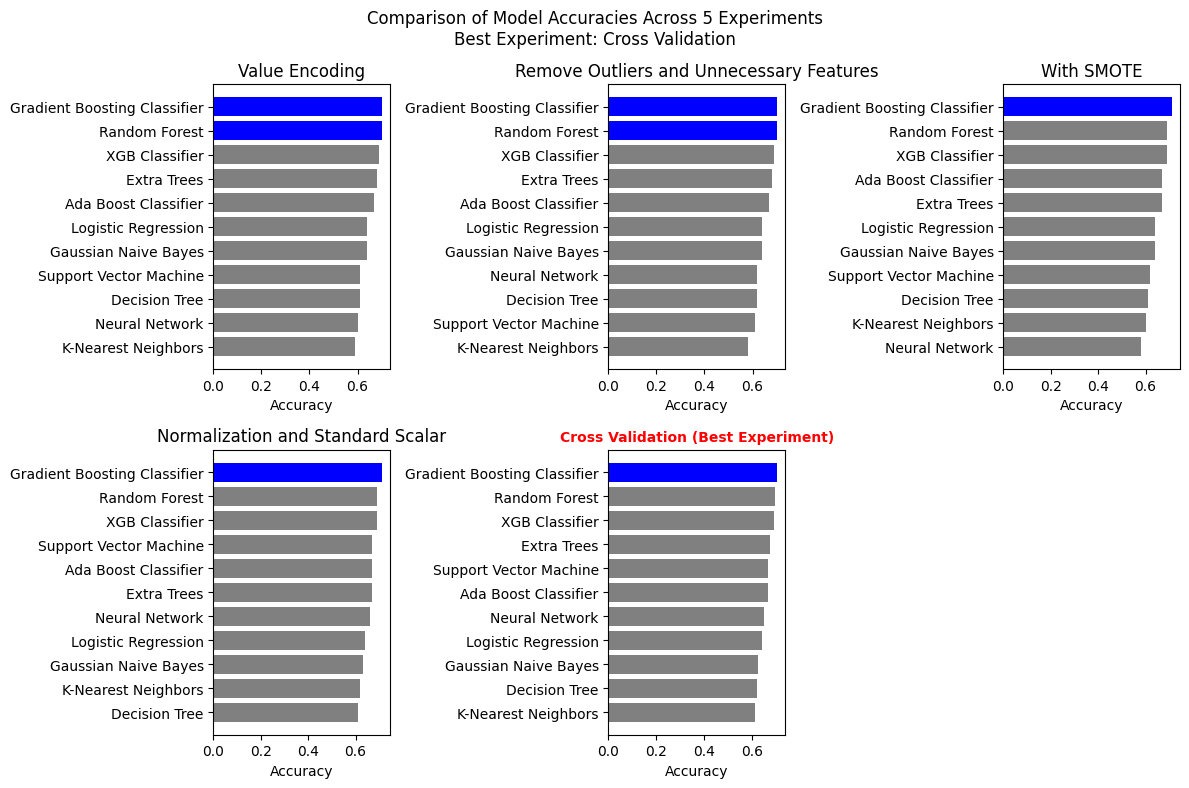

In [ ]:
import matplotlib.pyplot as plt

# Define the data for each experiment
experiments = {
    "Value Encoding": {
        'Neural Network': 0.60,
        'Logistic Regression': 0.64,
        'Support Vector Machine': 0.61,
        'Ada Boost Classifier': 0.67,
        'Gradient Boosting Classifier': 0.70,
        'K-Nearest Neighbors': 0.59,
        'Gaussian Naive Bayes': 0.64,
        'Extra Trees': 0.68,
        'Random Forest': 0.70,
        'Decision Tree': 0.61,
        'XGB Classifier': 0.69
    },
    "Remove Outliers and Unnecessary Features": {
        'Neural Network': 0.62,
        'Logistic Regression': 0.64,
        'Support Vector Machine': 0.61,
        'Ada Boost Classifier': 0.67,
        'Gradient Boosting Classifier': 0.70,
        'K-Nearest Neighbors': 0.58,
        'Gaussian Naive Bayes': 0.64,
        'Extra Trees': 0.68,
        'Random Forest': 0.70,
        'Decision Tree': 0.62,
        'XGB Classifier': 0.69
    },
    "With SMOTE": {
        'Neural Network': 0.58,
        'Logistic Regression': 0.64,
        'Support Vector Machine': 0.62,
        'Ada Boost Classifier': 0.67,
        'Gradient Boosting Classifier': 0.71,
        'K-Nearest Neighbors': 0.60,
        'Gaussian Naive Bayes': 0.64,
        'Extra Trees': 0.67,
        'Random Forest': 0.69,
        'Decision Tree': 0.61,
        'XGB Classifier': 0.69
    },
    "Normalization and Standard Scalar": {
        'Neural Network': 0.66,
        'Logistic Regression': 0.64,
        'Support Vector Machine': 0.67,
        'Ada Boost Classifier': 0.67,
        'Gradient Boosting Classifier': 0.71,
        'K-Nearest Neighbors': 0.62,
        'Gaussian Naive Bayes': 0.63,
        'Extra Trees': 0.67,
        'Random Forest': 0.69,
        'Decision Tree': 0.61,
        'XGB Classifier': 0.69
    },
    "Cross Validation": {
        'Neural Network': 0.653,
        'Logistic Regression': 0.641,
        'Support Vector Machine': 0.667,
        'Ada Boost Classifier': 0.667,
        'Gradient Boosting Classifier': 0.704,
        'K-Nearest Neighbors': 0.614,
        'Gaussian Naive Bayes': 0.625,
        'Extra Trees': 0.675,
        'Random Forest': 0.699,
        'Decision Tree': 0.621,
        'XGB Classifier': 0.695
    }
}

# Find the experiment with the highest average accuracy
best_experiment = max(experiments, key=lambda x: sum(experiments[x].values()) / len(experiments[x]))

# Plotting
plt.figure(figsize=(12, 8))

for i, (exp_name, accuracies) in enumerate(experiments.items(), start=1):
    plt.subplot(2, 3, i)
    sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
    models, scores = zip(*sorted_accuracies)
    plt.barh(models, scores, color=['blue' if s == max(scores) else 'grey' for s in scores])
    plt.xlabel('Accuracy')
    if exp_name == best_experiment:
        plt.title(f'{exp_name} (Best Experiment)', fontsize=10, fontweight='bold', color='red')
    else:
        plt.title(exp_name)
    plt.gca().invert_yaxis()

# Add title and subtitle for the best experiment
plt.suptitle(f'Comparison of Model Accuracies Across 5 Experiments\nBest Experiment: {best_experiment}', fontsize=12)
plt.tight_layout()
plt.show()
